In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
location_data_path = '/content/locationData.csv'
weather_data_path = '/content/weatherData.csv'

In [8]:
#read dataframes
location_data = pd.read_csv(location_data_path)
weather_data = pd.read_csv(weather_data_path)

In [9]:
#combine two dataframes
merged_data = pd.merge(weather_data, location_data, on='location_id')

In [10]:
#verify that the merge was successful
merged_data.head()

,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,et0_fao_evapotranspiration (mm),sunrise,sunset,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation,city_name
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,4.61,06:22,18:05,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
1,0,1/2/2010,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,3.91,06:22,18:06,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
2,0,1/3/2010,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,3.66,06:22,18:06,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
3,0,1/4/2010,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,3.75,06:23,18:07,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo
4,0,1/5/2010,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,5.00,06:23,18:07,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo


In [11]:
#count of missing values in each column
missing_values = merged_data.isnull().sum()
print(missing_values)

location_id                        0
date                               0
weather_code (wmo code)            0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
daylight_duration (s)              0
sunshine_duration (s)              0
precipitation_sum (mm)             0
rain_sum (mm)                      0
precipitation_hours (h)            0
wind_speed_10m_max (km/h)          0
wind_gusts_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
shortwave_radiation_sum (MJ/m²)    0
et0_fao_evapotranspiration (mm)    0
sunrise                            0
sunset                             0
latitude                           0
longitude                          0
elevation                          0
utc_offset_seconds                 0
timezone                           0
timezone_abbreviation              0
c

In [12]:
#merged_data where there are no missing values
cleaned_data = merged_data.dropna()

In [13]:
#converts the weather_code (wmo code) column to a categorical data type assigns a numerical code to each category
cleaned_data['weather_code_cat'] = cleaned_data['weather_code (wmo code)'].astype('category').cat.codes

In [14]:
#converts the date column from a string to a datetime object
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], format='%m/%d/%Y')

In [15]:
#displays the first few rows of the cleaned dataframe
cleaned_data.head()

,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,sunrise,sunset,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation,city_name,weather_code_cat
0,0,2010-01-01,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,06:22,18:05,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo,1
1,0,2010-01-02,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,06:22,18:06,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo,4
2,0,2010-01-03,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,06:22,18:06,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo,4
3,0,2010-01-04,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,06:23,18:07,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo,2
4,0,2010-01-05,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,06:23,18:07,6.924429,79.90725,4,19800,Asia/Colombo,530,Colombo,1


# **Data Visualization**

---



##Distribution of weather conditions


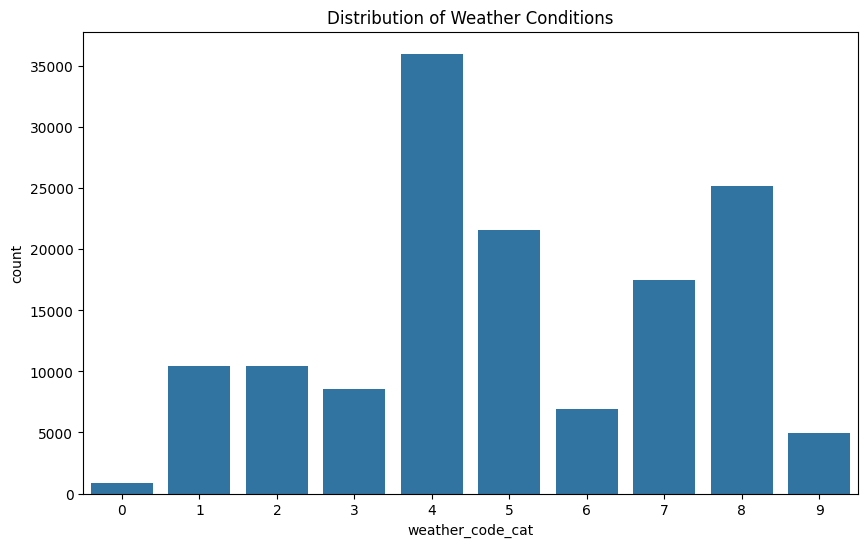

In [16]:
#countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_code_cat', data=cleaned_data)
plt.title('Distribution of Weather Conditions')
plt.show()

##Correlation heatmap for numerical features

In [17]:
numeric_data = cleaned_data.select_dtypes(include=['float64', 'int64'])

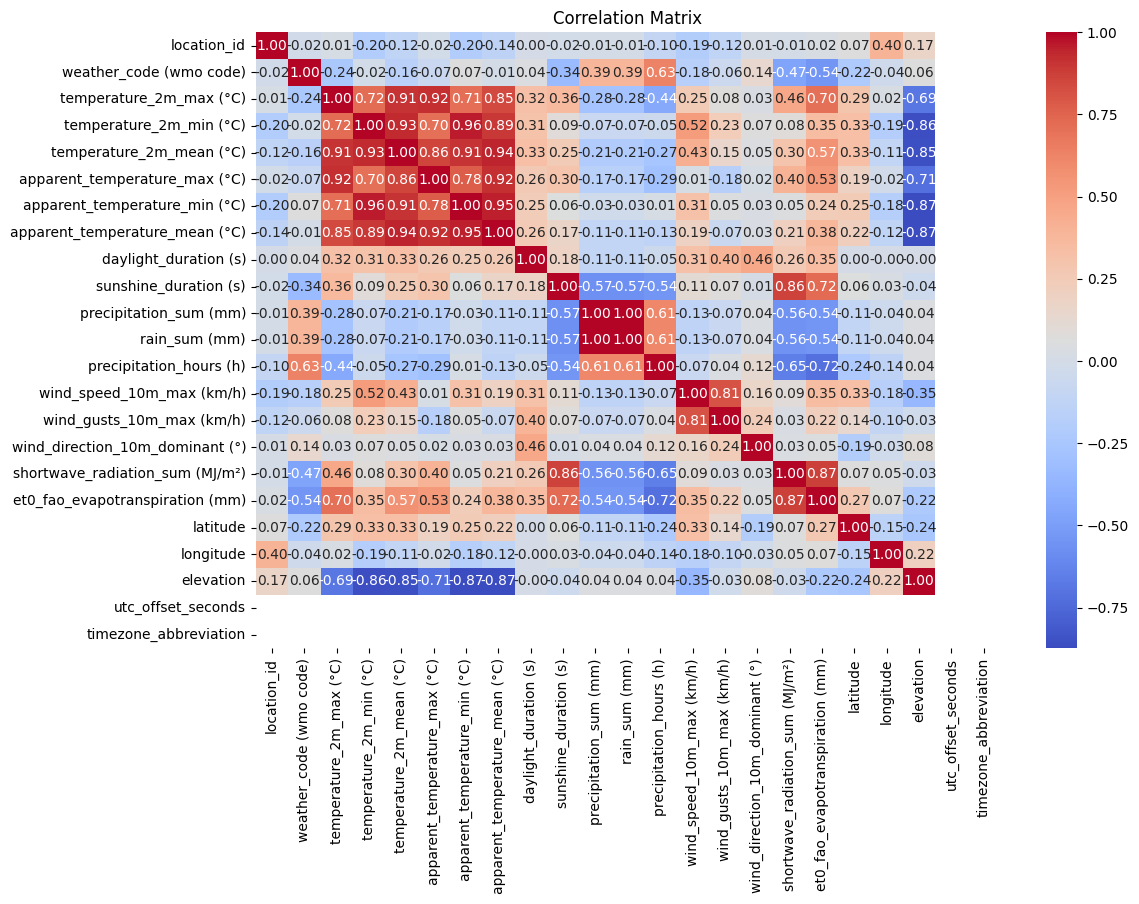

In [20]:
#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##Boxplot of temperature against weather condition


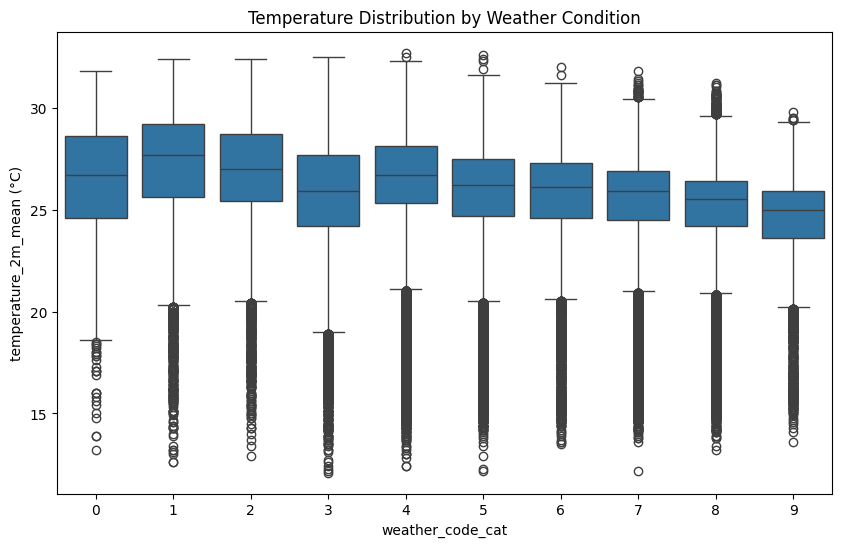

In [21]:
#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_code_cat', y='temperature_2m_mean (°C)', data=cleaned_data)
plt.title('Temperature Distribution by Weather Condition')
plt.show()